# The Sparks Foundation
## Data Science & Business Analytics Intern
### Liza Rani Choudhury

## Task 2

### Prediction using Unsupervised ML
#### From a given dataset , predict the optimum number of clusters and represent it visually

Let's import the required libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

In [35]:
plt.rcParams['figure.figsize']=[15,8]

### Data Preparation

### Read data

In [12]:
# Load the iris dataset
iris = datasets.load_iris()
df= pd.DataFrame(iris.data, columns = iris.feature_names)
df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Let us now see the number of variables and observations in the data.

In [14]:
df.shape

(150, 4)

 **Interpretation**: The dataset has 150 observations and 4 variables

### Check the data type

In [17]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

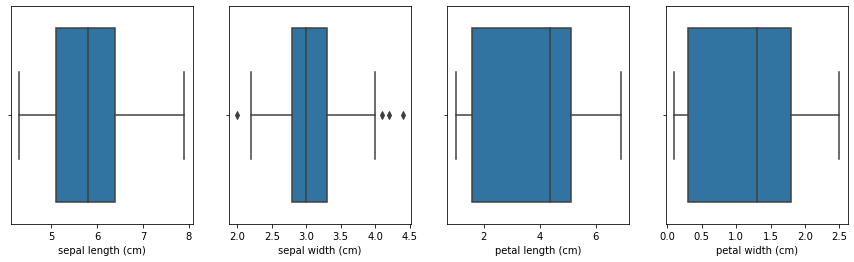

In [36]:
# plot the boxplot for each numerical variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize=(15, 4))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df.columns, ax.flatten()):
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(df[variable], ax = subplot)

# display the plot
plt.show()

## Missing Value Treatment

In [25]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

**Interpretation:**   The above output shows that thers is no missing values in the data

## K-Means Clustering

Let us perform the centroid-based clustering algorithm (i.e. K-Means). Such algorithms are efficient but sensitive to initial conditions and outliers. K-means is the most widely-used centroid-based clustering algorithm.

Here we consider elbow plot to decide the optimal value of K to perform the K-means clustering.

### Optimal Value of K using elbow plot

Elbow plot is plotted with the value of K on the x-axis and the WCSS (Within Cluster Sum of Squares) on the y-axis. The value of K corresponding to the elbow point represents the optimal value for K.

In [29]:
from sklearn.cluster import KMeans

In [33]:
# create several cluster combinations ranging from 1 to 11 and observe the wcss (Within Cluster Sum of Squares) for each cluster
# consider an empty list to store the WCSS
wcss  = []

# use for loop to perform K-means with different values of K
# set the 'random_state' to obtain the same centroid initialization for each code run
# append the value of WCSS for each K to the list 'wcss'
# the 'inertia_' retuns the WCSS for specific value of K
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)


let's plot the elbow plot and find the elbow point

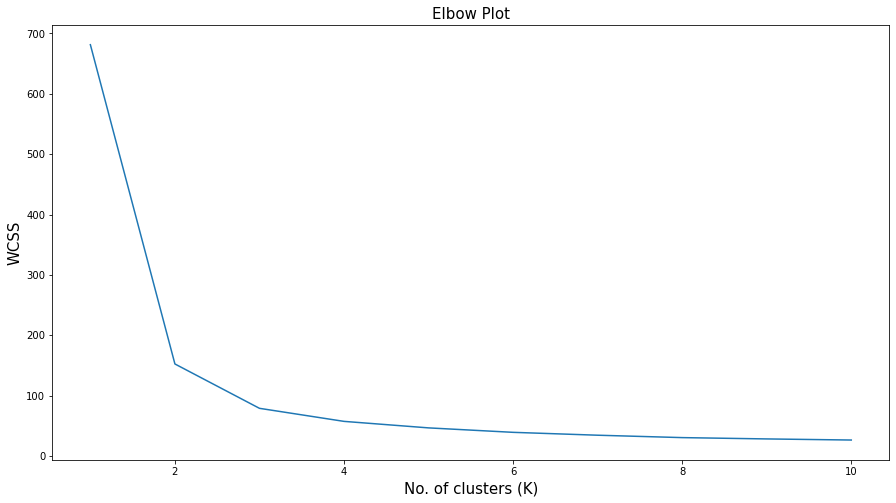

In [37]:
# visualize the elbow plot to get the optimal value of K
plt.plot(range(1,11), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** We can see that the for K = 3, there is an elbow in the plot. Before this elbow point, the WCSS is decreasing rapidly and after K = 5, the WCSS is decreasing slowly.

### Build the Clusters

In [40]:
# build a K-Means model with 3 clusters
new_clusters = KMeans(n_clusters = 3, random_state = 10)

# fit the model
new_clusters.fit(df)

# append the cluster label for each point in the dataframe 'df_cust'
df['Cluster'] = new_clusters.labels_

In [41]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Check the size of each cluster

In [42]:
df['Cluster'].value_counts()

1    62
0    50
2    38
Name: Cluster, dtype: int64

### Analyze the clusters

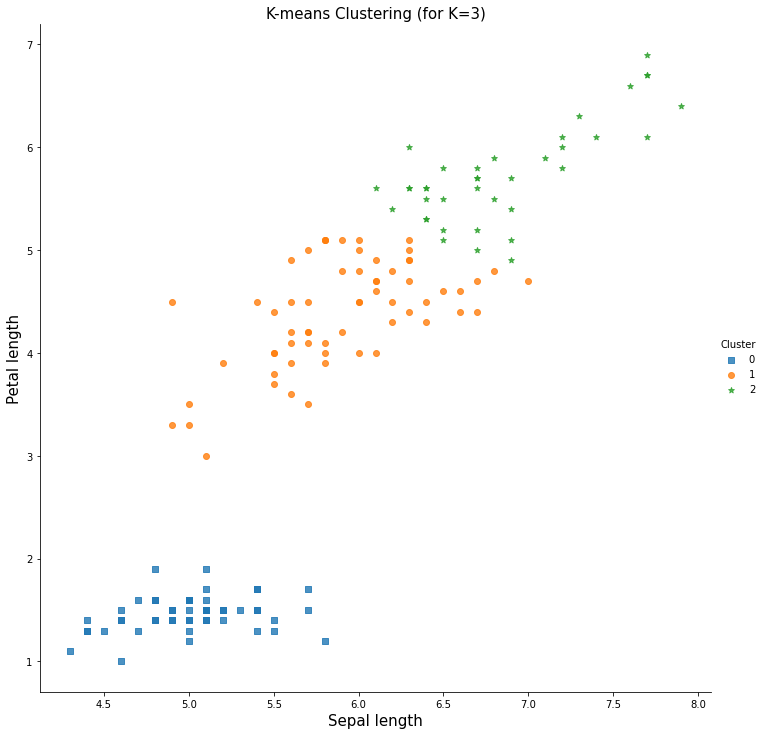

In [56]:
# plot the lmplot to visualize the clusters
# pass the different markers to display the points in each cluster with different shapes
# the 'hue' parameter returns colors for each cluster
sns.lmplot( x = 'sepal length (cm)', y = 'petal length (cm)',data =df, hue = 'Cluster', 
                markers = [',',  'o', '*'], fit_reg = False, size = 10)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('K-means Clustering (for K=3)', fontsize = 15)
plt.xlabel('Sepal length', fontsize = 15)
plt.ylabel('Petal length', fontsize = 15)

# display the plot
plt.show()